# Computational Methods in Stochastics - Assignment 3

In [2]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import sys

## Exercise 1

### a)

This is Markov Matrix:
$\begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0.9 & 0 & 0.1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0.8 & 0 & 0.2 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0.7 & 0 & 0.3 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0.6 & 0 & 0.4 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0.5 & 0 & 0.5 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0.4 & 0 & 0.6 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0.3 & 0 & 0.7 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.2 & 0 & 0.8 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.1 & 0.9
\end{bmatrix}$


State vector: $\begin{bmatrix}
    1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10
\end{bmatrix}$, 

with sale probabilities $\begin{bmatrix}
    0 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9
\end{bmatrix}$ <br>

### b and c)

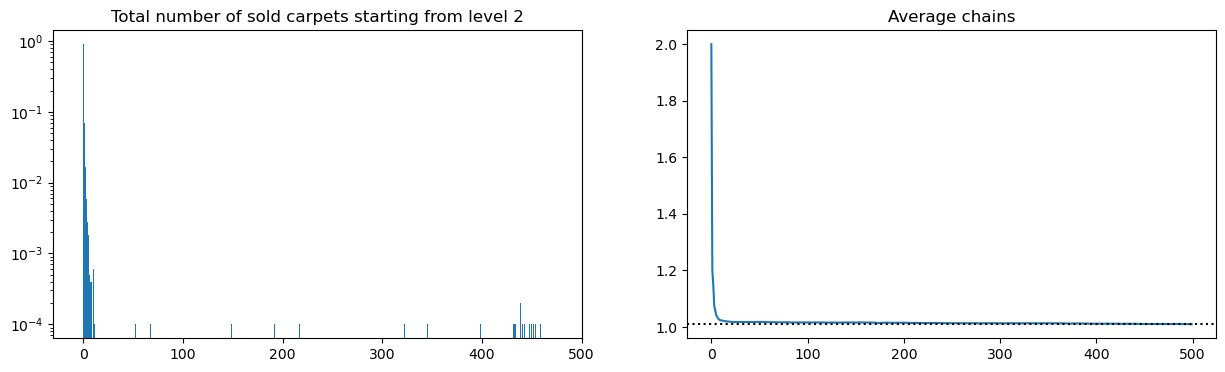

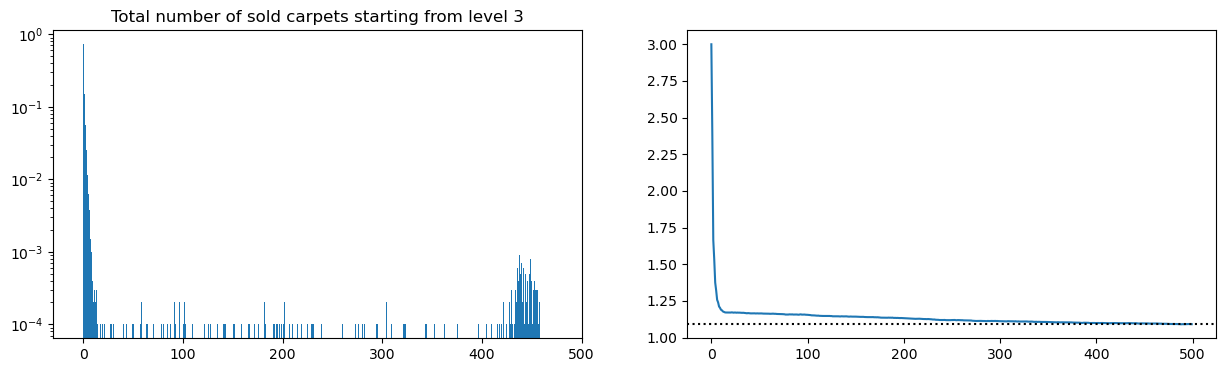

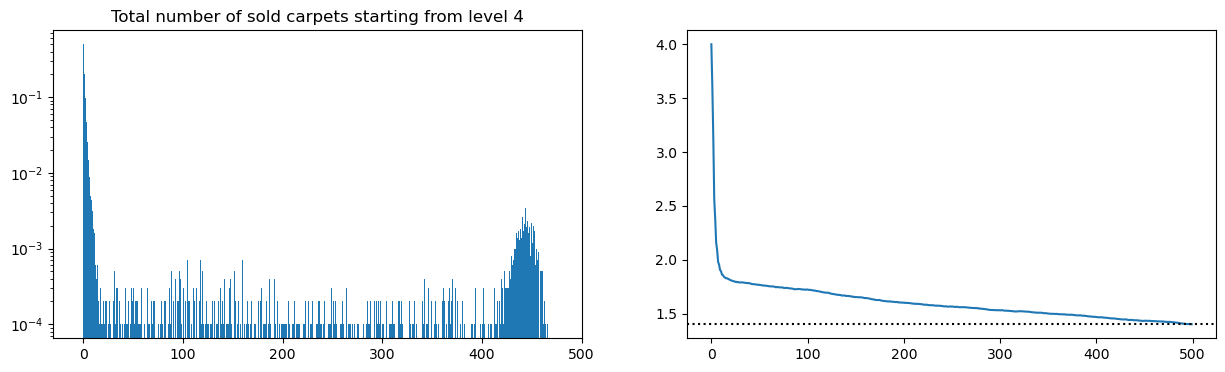

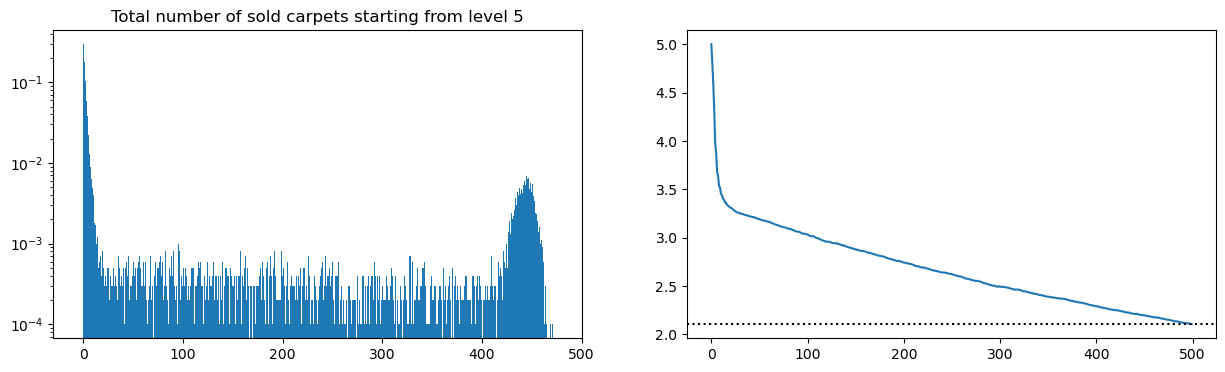

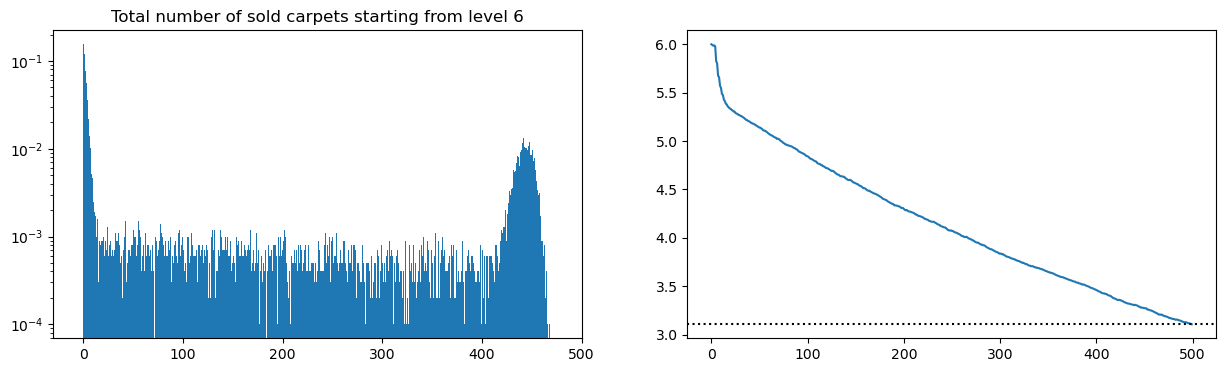

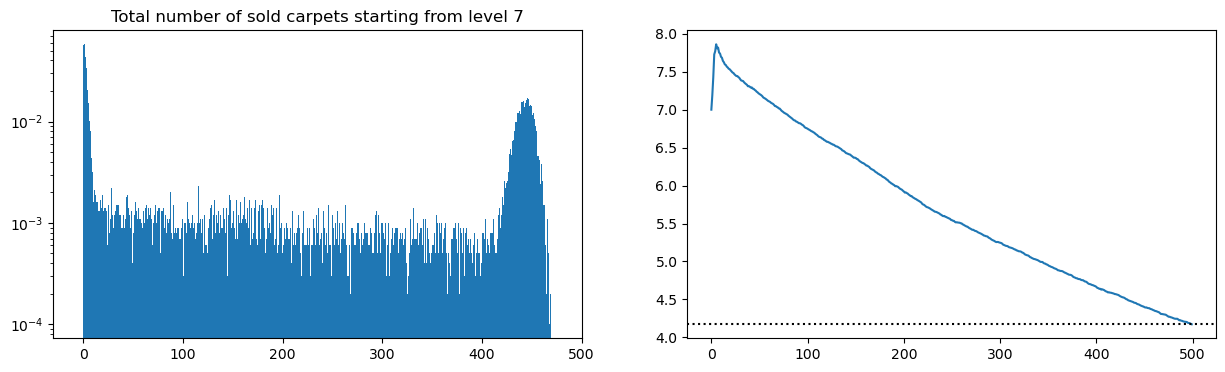

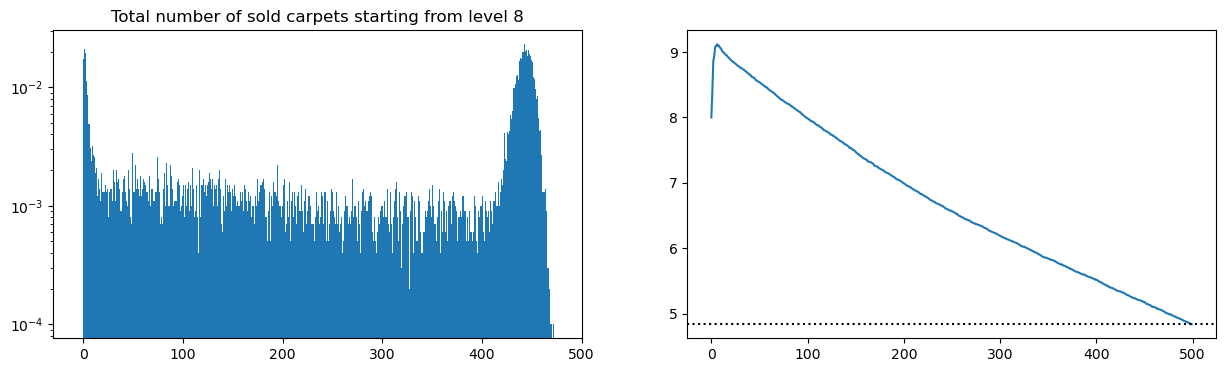

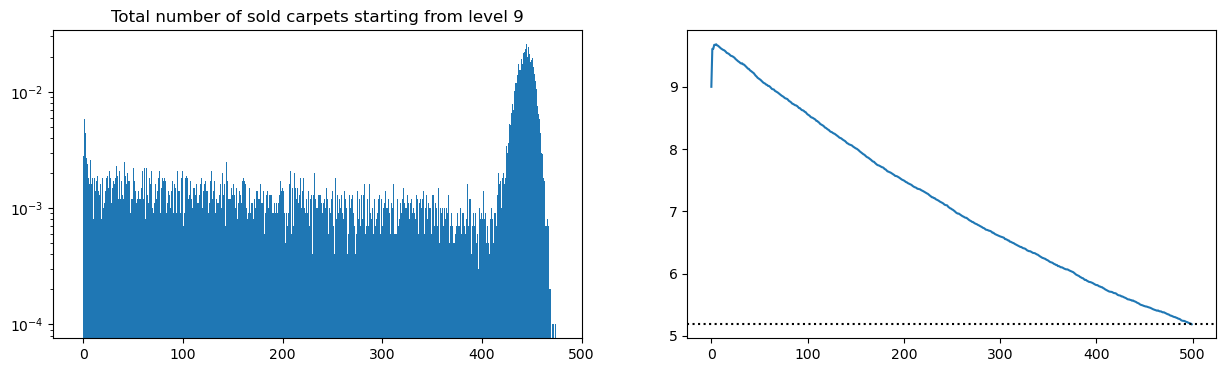

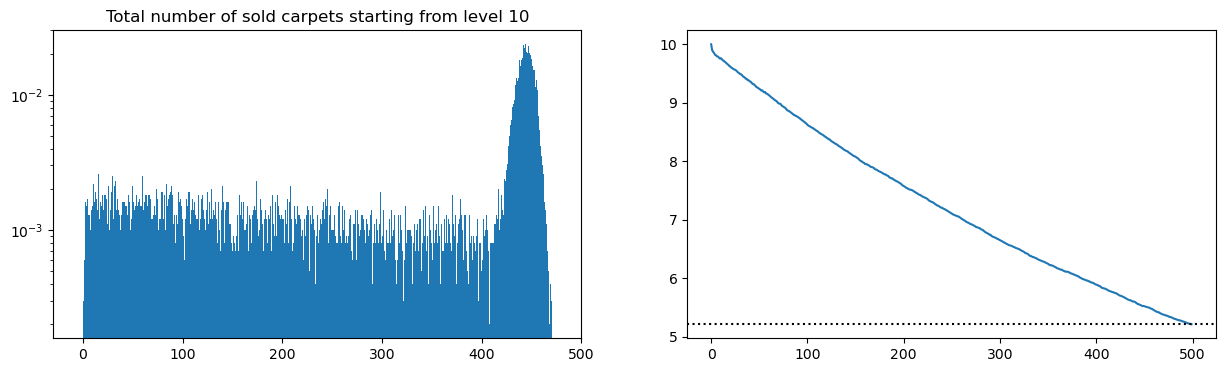

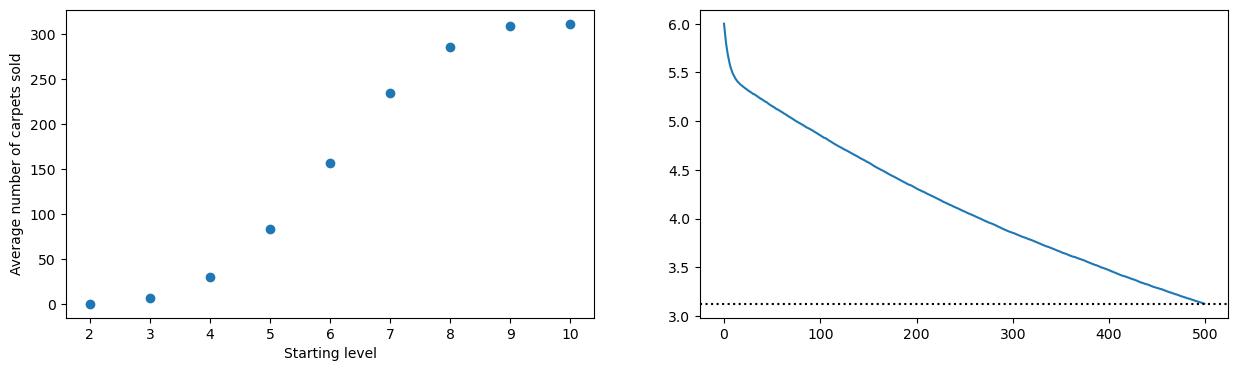

In [1]:
import numpy as np
import matplotlib.pyplot as plt

state_vector = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
states = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])
t = 500
N = 10000
tn = 5

m = np.empty(len(states))
avg_chain = np.empty((len(states), t))

for state in range(len(states)):
    sc = np.zeros(N)
    chain = np.empty((N, t))
    
    for i in range(N):
        s = states[state]
        for j in range(t):
            chain[i, j] = s
            if (np.random.random() < state_vector[s - 1]):
                sc[i] += 1
                if (s != 10):
                    s += 1
            else:
                if (s != 1):
                    s -= 1
                    
    m[state] = np.floor(np.mean(sc))
    
    plt.figure(figsize=(15, 4))
    plt.subplot(121)
    h = plt.hist(sc, bins=int(np.max(sc) - np.min(sc)), density="True")[0]
    plt.yscale('log')
    plt.xlim(-30, 500)
    plt.title("Total number of sold carpets starting from level " + str(state + 2))
    
    plt.subplot(122)
    if (state == 0):
        plt.title("Average chains")
    
    for j in range(t):
        avg_chain[state, j] = np.mean(chain[:, j])
    
    plt.plot(range(t), avg_chain[state, :])
    plt.axhline(y=avg_chain[state, t - 1], linestyle=":", linewidth=1.5, color="BLACK")
    plt.show()

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.scatter(states, m)
plt.xlabel("Starting level")
plt.ylabel("Average number of carpets sold")
plt.subplot(122)

avgg_chain = np.empty(t)
for j in range(t):
    avgg_chain[j] = np.mean(avg_chain[:, j])

plt.plot(range(t), avgg_chain)
plt.axhline(y=avgg_chain[t - 1], linestyle=":", linewidth=1.5, color="BLACK")
plt.show()


### d, e, and f)

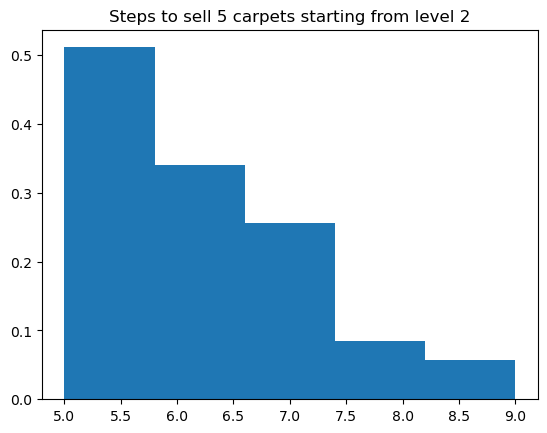

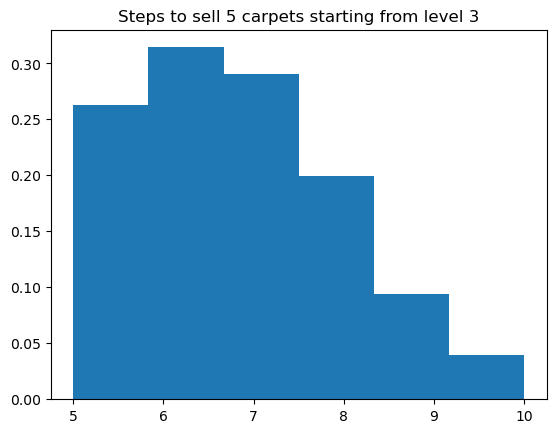

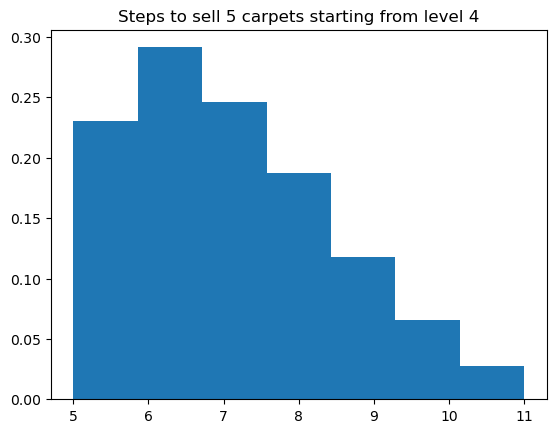

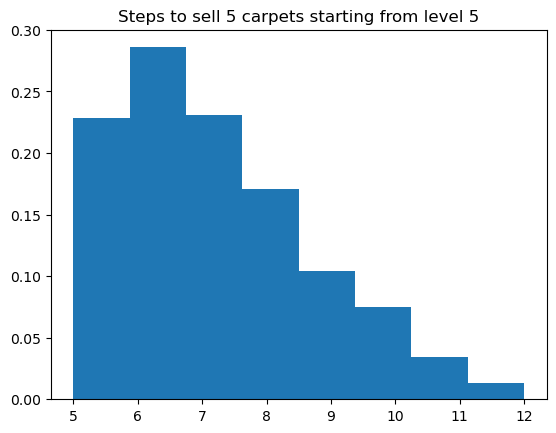

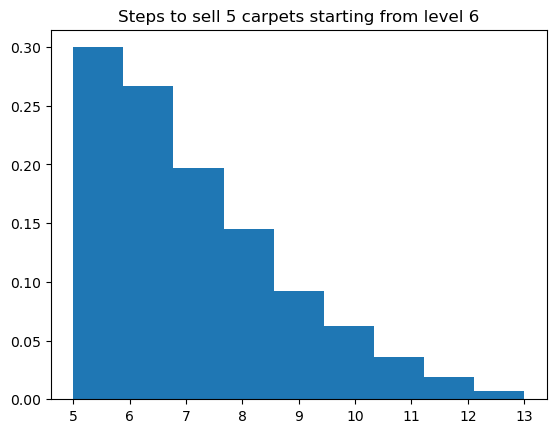

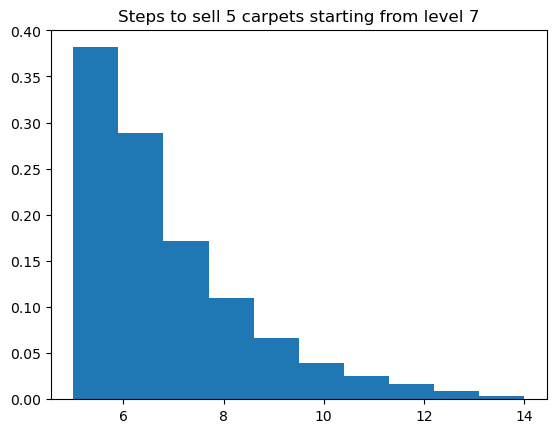

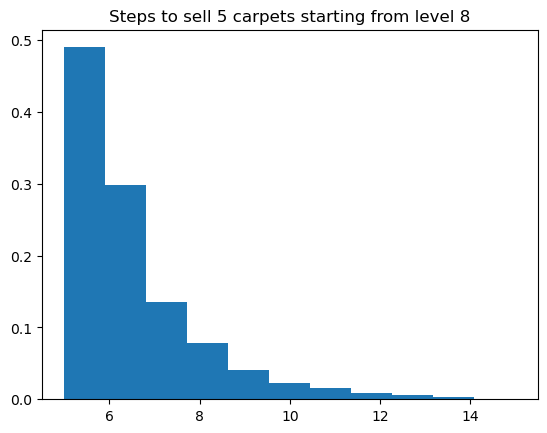

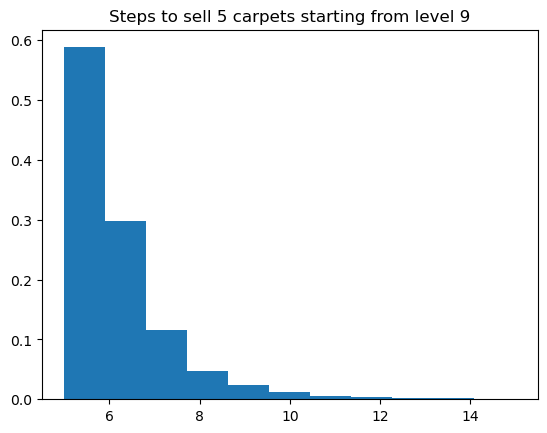

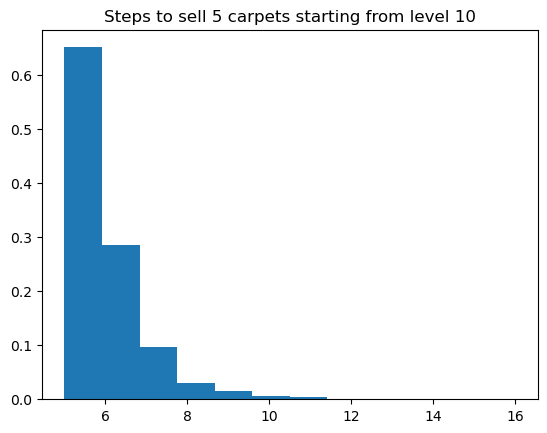

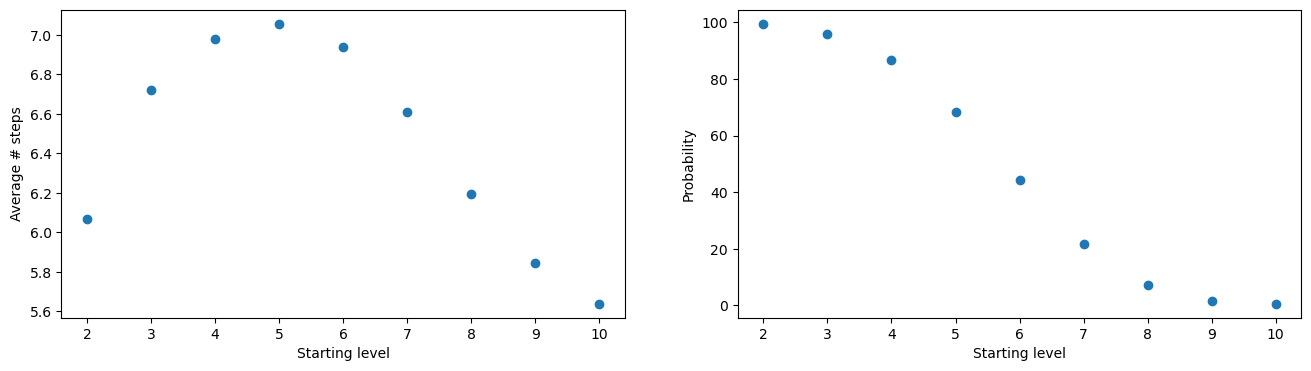

In [6]:
m = np.empty(len(states))
p = np.empty(len(states))

for state in range(len(states)):
    sc = np.zeros(N)
    sn = np.zeros(N)
    
    for i in range(N):
        s = states[state]
        
        for j in range(t):
            if np.random.random() < state_vector[s - 1]:
                sc[i] += 1
                
                if sc[i] == tn:
                    sn[i] = j + 1
                    break
                
                if s != 10:
                    s += 1
            else:
                if s != 1:
                    s -= 1
    
    m[state] = np.mean(sn[np.where(sn != 0)])
    p[state] = (1 - len(np.where(sn != 0)[0]) / len(sn)) * 100
    
    h = plt.hist(sn[np.where(sn != 0)], bins=1 + int(np.max(sn) - np.min(sn[np.where(sn != 0)])), density=True)[0]
    plt.title("Steps to sell " + str(tn) + " carpets starting from level " + str(state + 2))
    plt.show()

plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.scatter(states, m)
plt.xlabel("Starting level")
plt.ylabel("Average # steps")
plt.subplot(122)
plt.scatter(states, p)
plt.xlabel("Starting level")
plt.ylabel("Probability")
plt.show()


### g)

When the initial excitement levels are sufficiently high, the probability mass functions (PMFs) tend to exhibit a clear and distinct mathematical pattern known as a Geometric Distribution. This distribution closely resembles a discrete exponential distribution. This observation arises because Markov chains possess a property known as the Markov Property, denoted as $P(S_{t+1}|S_t) = P(S_{t+1}|S_0, \ldots, S_{t})$, which essentially characterizes the system as "memoryless." This characteristic is analogous to the memoryless property of the exponential distribution, a well-known mathematical concept.

## Exercise 2

### a)

Simulate the phenomenon by sampling the waiting times between splits:

In [10]:
ts_1 = []
N0 = 10000
l = 0.2
N = 100

def inv_cdf(p, l):
    return -math.log(1 - p) / l

for n in range(N):
    if n % 100 == 0:
        sys.stdout.write(("%2.1f" % (n / N * 100)) + "% \r")
        sys.stdout.flush()
    k = 0
    t = 0
    while k < N0 / 2:
        r = np.random.random()
        nt = inv_cdf(r, (N0 - k) * l)
        t += nt
        k += 1
    ts_1.append(t)

NameError: name 'sys' is not defined

Simulate in discrete time steps:

In [42]:
N0 = 10000
ts_2 = []
l = 0.2
sequences = 1000
dt = 0.01

def poisson_sample(l):
    k = 0
    p = 1
    L = np.exp(-l)
    while p > L:
        k += 1
        p *= np.random.random()
    return k-1

for seq in range(sequences):
    k = 0
    step = 0
    while k < 0.5*N0:
        t = dt*step
        sample = poisson_sample((N0-k)*l*dt)
        k += sample
        step += 1
    ts_2.append(step * dt)

### b)

In [43]:
mean = sum(ts_1)/len(ts_1)
var = sum([(t-mean)**2 for t in ts_1])/len(ts_1)
print("Time (mean, variance): ", (mean, var))

Time (mean, variance):  (3.4696666707539583, 0.0024000712673355328)


In [44]:
mean = sum(ts_2)/len(ts_2)
var = sum([(t-mean)**2 for t in ts_2])/len(ts_2)
print("Time (mean, variance): ", (mean, var))

Time (mean, variance):  (3.4702599999999943, 0.002505132400000006)
